<a href="https://colab.research.google.com/github/BRIAN12682/Automation-Projects/blob/main/ImageClassificationVi_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

In [1]:
pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-ybfjerl7
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-ybfjerl7
  Resolved https://github.com/huggingface/transformers.git to commit d475f76745c0c90bb3ffc85c0ee7511705a119ba
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9139777 sha256=7814ac98160c27940cb32ed04a01442ce9da7597556ea3998cae329f67ec7783
  Stored in directory: /tmp/pip-ephem-wheel-cache-moqz5xlq/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

from PIL import Image

import requests

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


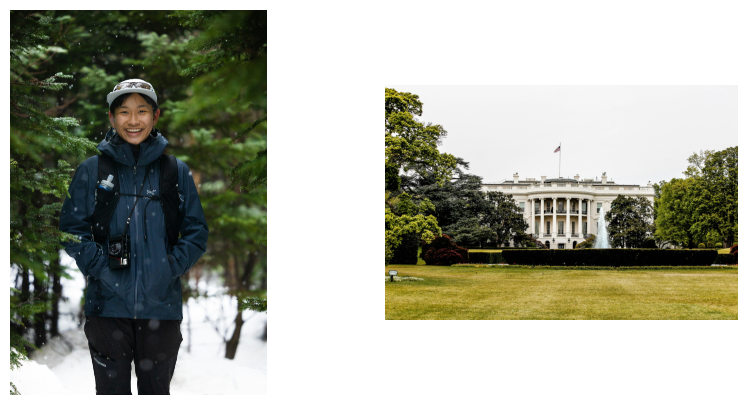

In [20]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Paths to the image files
img_path_1 = '/content/drive/My Drive/smileyman.jpg'
img_path_2 = '/content/drive/My Drive/whitehouse.jpg'

# Load the images
img1 = mpimg.imread(img_path_1)
img2 = mpimg.imread(img_path_2)

# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img1)
axs[0].axis('off')  # Hide the axes for the first image

axs[1].imshow(img2)
axs[1].axis('off')  # Hide the axes for the second image

plt.show()


In [21]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [27]:
inputs = feature_extractor(images=img2, return_tensors="pt")

In [28]:
outputs = model(**inputs)

logits = outputs.logits

In [30]:
predicted_class_idx = logits.argmax(-1).item()

print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: palace


# Object Detection

In [ ]:
!pip install transformers
!pip install torch
!pip install torchvision
!pip install PIL


In [3]:
!pip install transformers timm torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the model and feature extractor
feature_extractor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# Path to the image file
img_path = '/content/drive/My Drive/smileyman.jpg'

# Load the image
image = Image.open(img_path)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")


In [7]:
# Perform object detection
outputs = model(**inputs)

# Let's turn the outputs into bounding boxes and labels
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]


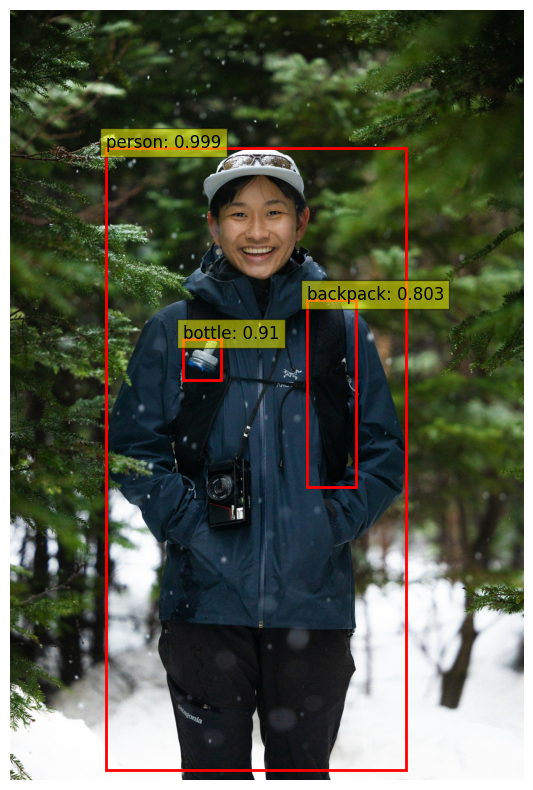

In [8]:
# Set up plot
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Get the bounding boxes and labels
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # If the score is below a threshold, skip this detection
    if score < 0.7:
        continue

    # Convert bounding box to pixel values
    box = [round(i, 2) for i in box.tolist()]
    xmin, ymin, xmax, ymax = box

    # Create a rectangle patch
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    # Add the label
    plt.text(xmin, ymin, f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}", fontsize=12,
             bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis('off')
plt.show()
